In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
imgdir = "./gray_crab/"

In [19]:
import os
files = os.listdir(imgdir)

len(files)

154

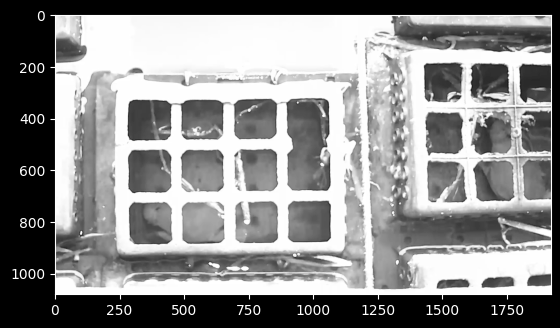

In [20]:
# sample show

img = cv2.imread(imgdir + files[5], cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

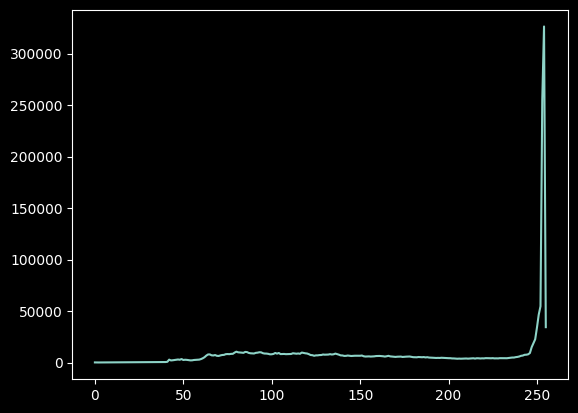

In [21]:
# plot histogram

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist)

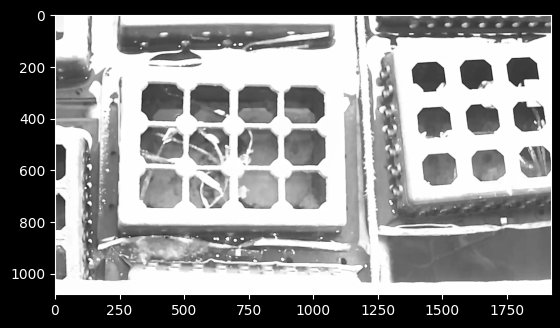

In [25]:
img2 = cv2.imread(imgdir + files[100], cv2.IMREAD_GRAYSCALE)

plt.imshow(img2, cmap='gray')

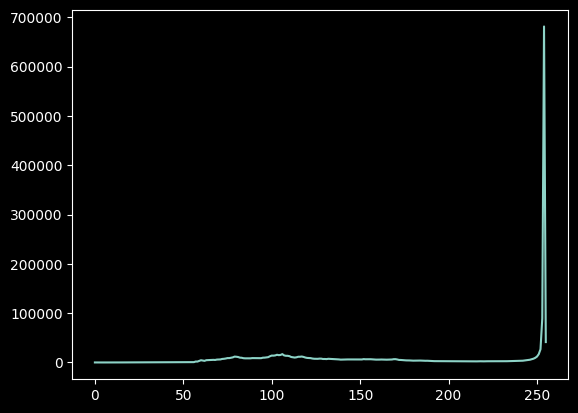

In [26]:
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])

plt.plot(hist2)

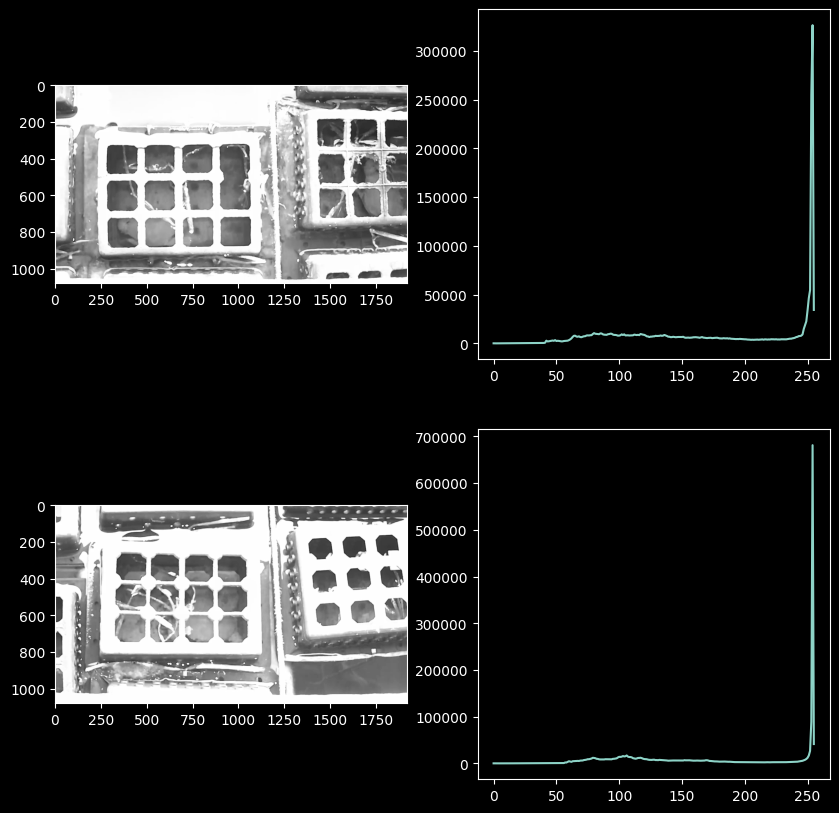

In [29]:
# subplot

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(2, 2, 2)
plt.plot(hist)
plt.subplot(2, 2, 3)
plt.imshow(img2, cmap='gray')
plt.subplot(2, 2, 4)
plt.plot(hist2)

plt.show()



In [35]:
# count most frequent color
order = hist.argsort(axis=0)

# get top 10 most frequent color
order[-30:]

array([[ 88],
       [112],
       [ 95],
       [246],
       [104],
       [102],
       [118],
       [ 87],
       [ 91],
       [ 84],
       [ 92],
       [ 83],
       [ 79],
       [117],
       [ 82],
       [ 94],
       [ 81],
       [ 93],
       [ 86],
       [ 85],
       [ 80],
       [247],
       [248],
       [249],
       [250],
       [255],
       [251],
       [252],
       [253],
       [254]], dtype=int64)

In [33]:
# count most frequent color
order2 = hist2.argsort(axis=0)

# get top 10 most frequent color
order2[-30:]

array([[ 78],
       [114],
       [112],
       [ 98],
       [ 81],
       [111],
       [118],
       [115],
       [ 80],
       [116],
       [250],
       [ 79],
       [117],
       [ 99],
       [110],
       [109],
       [108],
       [101],
       [100],
       [102],
       [107],
       [104],
       [105],
       [103],
       [251],
       [106],
       [252],
       [255],
       [253],
       [254]], dtype=int64)

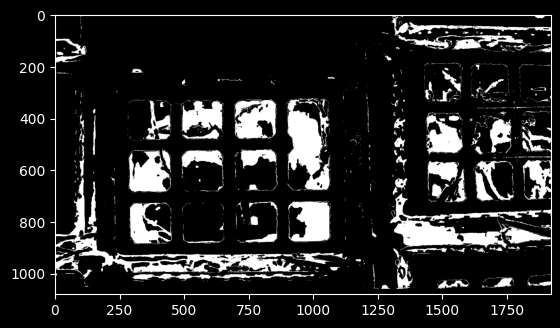

In [38]:
threshold_obj1 = [80, 118]
threshold_obj2 = [240, 255]

# thresholding
img_th = cv2.inRange(img, threshold_obj1[0], threshold_obj1[1])

plt.imshow(img_th, cmap='gray')

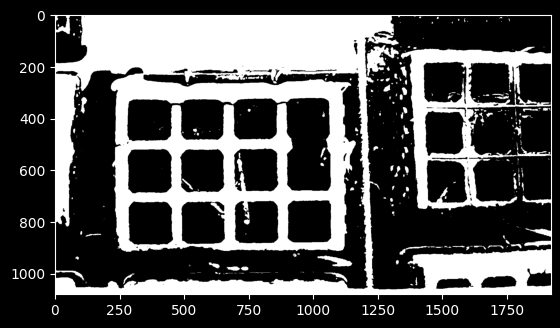

In [39]:
img_th2 = cv2.inRange(img, threshold_obj2[0], threshold_obj2[1])

plt.imshow(img_th2, cmap='gray')

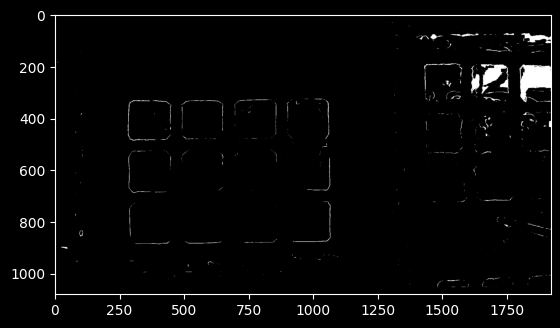

In [44]:
img_th = cv2.inRange(img, 0, 50)

plt.imshow(img_th, cmap='gray')

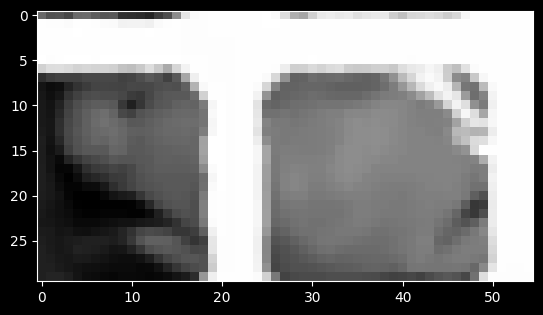

In [45]:
crab = cv2.imread("./component/crab.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(crab, cmap='gray')

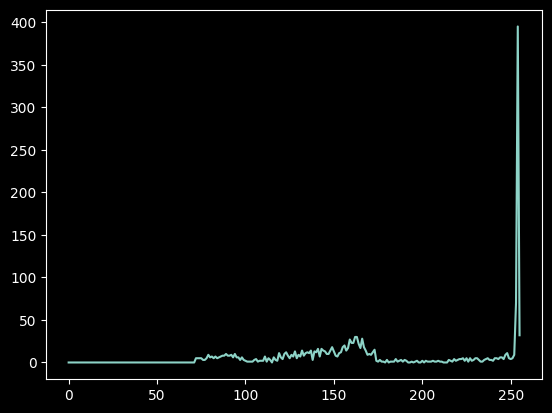

In [46]:
# distribution of color
hist_crab = cv2.calcHist([crab], [0], None, [256], [0, 256])

plt.plot(hist_crab)

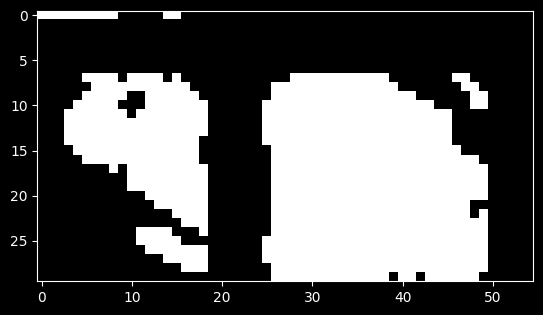

In [56]:
range_crab = [120, 175]

crab_th = cv2.inRange(crab, range_crab[0], range_crab[1])

plt.imshow(crab_th, cmap='gray')

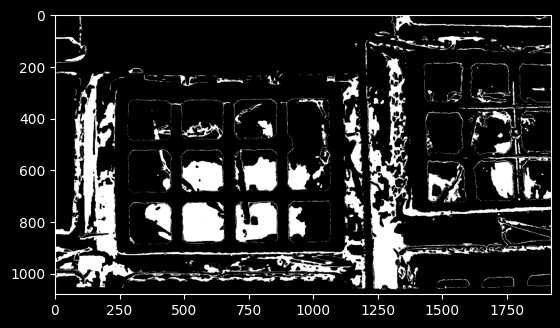

In [57]:
img_th = cv2.inRange(img, range_crab[0], range_crab[1])

plt.imshow(img_th, cmap='gray')

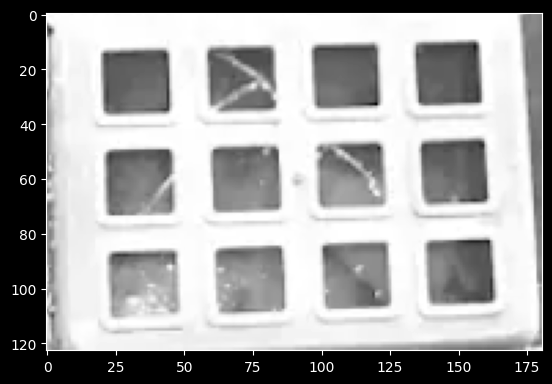

In [62]:
component = cv2.imread("./matchcomponent/cmp1.png", cv2.IMREAD_GRAYSCALE)



plt.imshow(component, cmap='gray')

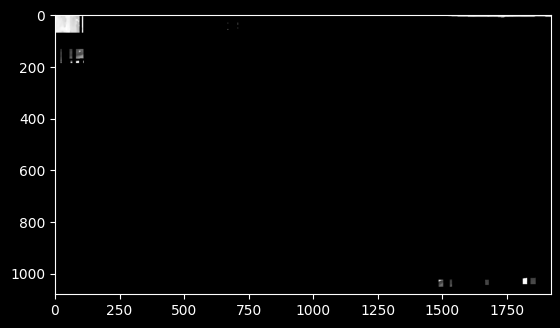

In [64]:
#  template matching
res = cv2.matchTemplate(img, component, cv2.TM_CCOEFF)

threshold = 0.8

loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + component.shape[1], pt[1] + component.shape[0]), (0, 255, 0), 2)

plt.imshow(img, cmap='gray')